# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=83059d817af36c2216b103cb003e652fe860b9f861012b86f292bc1c3e9bd64f
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.0 MB/s eta 0:00:00


In [3]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"



































































### 1-3. 한글 글꼴 설정(Colab)

In [4]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,055 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [5]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [8]:
data = pd.read_csv("/content/drive/MyDrive/4mini/새 폴더/train.csv")
test = pd.read_csv("/content/drive/MyDrive/4mini/새 폴더/test.csv")
test.shape

(929, 2)

In [10]:
test = test.drop("id",axis=1)
test

,text
0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요? 이...
1,"셀프테스트에서 받은 점수가 해당 교육을 이수하고, 취업 연계등을 하는데 있어서 영향..."
2,a= int(input('정수 A의 값을 입력하시오.:'))\nb= int(inpu...
3,"def max4(a,b,c,d):\n maximum = a\n if b&..."
4,i**=2 가 i **=2 와 왜 같은지가 이해가 잘 안됩니다!!
...,...
924,aice특강 ppt는 따로 안올려주시나요?
925,안녕하세요~!\n실습 중 궁금한 점이 있어 문의 드립니다. \n\n1. 라벨 인코더...
926,안녕하세요.\nkT AIDU에서 전에 Associate 시험에 대해 공부할 수 있는...
927,app 마다 urls.py 을 만들어서 관리하는게 더 좋은 코드인가요?\n아니면 s...


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
data

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격


In [ ]:
data.describe()

,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [ ]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
data[["label"]].value_counts()

label 
코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
dtype: int64

In [ ]:
len(data["label"].unique())

6

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
a=data["text"].astype('str').tolist()
b=[]
for i in a:
    b.append(len(i))
print(max(b))
print(b.index(max(b)))
# print(c)
display(data.loc[2561,"text"])

6012
2561


'sns.kdeplot(x = td[var])\nplt.show()\n\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n in \n----&gt; 1 sns.kdeplot(x = td[var])\n      2 plt.show()\n\n~\\anaconda3\\lib\\site-packages\\seaborn\\_decorators.py in inner_f(*args, **kwargs)\n     44             )\n     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})\n---&gt; 46         return f(**kwargs)\n     47     return inner_f\n     48 \n\n~\\anaconda3\\lib\\site-packages\\seaborn\\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)\n   1768             plot_kws["color"] = color\n   1769 \n-&gt; 1770         p.plot_univariate_densi

In [ ]:
print(min(b))
print(b.index(min(b)))
display(data.loc[b.index(min(b)),"text"])

9
756


'원격 부탁드립니다'

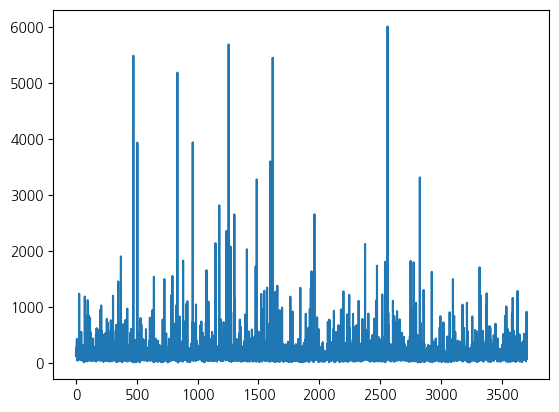

In [ ]:
plt.plot(b)
plt.show()

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
# %%time
from konlpy.tag import Okt
# a=data["text"].astype('str').tolist()
# okt = Okt()

# okt_a=[]
# okt_b=[]

# for idx, sentence in enumerate(a) :
#     for i,j in okt.pos(sentence):
#         okt_a.append((i,j))

# for idx, sentence in enumerate(a) :
#     for i in okt.nouns(sentence):
#         okt_b.append(i)

In [ ]:
# len(okt_b)

In [ ]:
# %%time
# from konlpy.tag import Kkma
# a=data["text"].astype('str').tolist()

# kkma = Kkma()

# kkma_a=[]
# kkma_b=[]

# for idx, sentence in enumerate(a) :
#     kkma_a.append(kkma.pos(sentence))

# for idx, sentence in enumerate(a) :
#     kkma_b.append(kkma.nouns(sentence))
# len(kkma_b)
def mecab_tokenizer(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

import re
def eng(text):
    words = re.findall(r"[a-zA-Z']+",text)
    eng_word = [word for word in words if len(word)>1]
    return eng_word
eng("김주얄 juyull 1234 don't not 'dsadsa'")

['juyull', "don't", 'not', "'dsadsa'"]

In [ ]:
mecab = MeCab()
# pos = data.text.apply(mecab_tokenizer)

In [ ]:
mecab_Tokenizer("김주얄 juyull 1234 don't not 'dsadsa'")

NameError: ignored

In [ ]:
%%time
a=data["text"].astype('str').tolist()

mecab = MeCab()

mecab_a=[]
mecab_a1=[]
mecab_b=[]
mecab_c=[]
mecab_d=[]
mecab_e=[]

for k in a :# 하나씩 다 넣은것
    for i,j in mecab.pos(k):
        mecab_a.append((i,j))

for k in a :# 문장씩 잘라서
    mecab_a1.append(mecab.pos(k))
###################################################################################################
for k in a :
    # 하나씩 다 넣은것
    for i in mecab.nouns(k):
        mecab_b.append(i)

##문장씩 잘라서
for k in a :
    mecab_c.append(mecab.nouns(k))

## eng 활용 , 하나씩 다 넣은것
for k in a :
    # print(k)
    for i in mecab.nouns(k):
        mecab_d.append(i)
    for j in eng(k):
        mecab_d.append(j)


##eng활용, 문장씩 잘라서
for k in a :
    mecab_e.append(mecab.nouns(k))
    for i in eng(k):
        mecab_e[-1].append(i)

CPU times: user 17.6 s, sys: 148 ms, total: 17.7 s
Wall time: 17.8 s


In [ ]:
print(len(mecab_a1[0]))

66


In [ ]:
len(mecab_a),len(mecab_b),len(mecab_c),len(mecab_d),len(mecab_e)  

(297496, 57025, 3706, 101160, 3706)

In [ ]:
print(mecab_e[0])

['여기', '커널', '사이즈', '은', '단어', '최대', '길이', '가정', '선언', '것', 'self', 'convs', 'nn', 'ModuleList', 'nn', 'Conv', 'Co', 'for', 'in', 'Ks']


In [ ]:
gasa=[]
gasa1=[]
gasa2=[]
gasa3=[]
gasa11=[]
for i in mecab_e :
    gasa.append(" ".join(i))
for i in mecab_c:
    gasa1.append(" ".join(i))
for i in mecab_a1:
    gasa2.append(len(i))
for i in mecab_e :
    gasa3.append(len(i))
for i in mecab_c:
    gasa11.append(len(i))

In [ ]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_wordss = [len(s.split()) for s in sample_texts]
    # print(num_wordss[:10])
    # print(num_wordss)
    return np.median(num_wordss)

def get_num_words_per_sample_mean(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_wordss = [len(s.split()) for s in sample_texts]
    # print(num_wordss[:10])
    # print(num_wordss)
    return np.mean(num_wordss)

In [ ]:
print(3706/get_num_words_per_sample(gasa))
print(3706/get_num_words_per_sample_mean(gasa))
print(3706/get_num_words_per_sample(gasa1))
print(3706/get_num_words_per_sample_mean(gasa1))
print(3706/np.mean(gasa2))
# print(len(pos)/pos.apply(len).mean())
# print(3706/np.mean(gasa3))
# print(3706/np.median(gasa3))
# print(3706/np.mean(gasa11))
# print(3706/np.median(gasa11))

205.88888888888889
135.76943455911427
308.8333333333333
240.84938185006575
46.16679215855003


### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
from nltk import Text
import warnings 
warnings.filterwarnings("ignore")  
nouns = data.text.apply(lambda t:mecab.nouns(str(t)))
print(nouns[0:10])

text_nltk_a = Text(mecab_a)
text_nltk_b = Text(mecab_b)
nltk_nouns = Text(nouns.explode())
print(nltk_nouns)
nltk_nouns = Text([w for w in nltk_nouns if isinstance(w,str)])
print(nltk_nouns)

0              [여기, 커널, 사이즈, 은, 단어, 최대, 길이, 가정, 선언, 것]
1    [이미지, 개, 업로드, 자바, 스크립트, 동적, 폼, 개, 생성, 데, 클릭, 뭘...
2    [사용, 때, 질문, 포함, 작동, 것, 질문, 제공, 파일, 폴더, 포함, 폴더,...
3                                             [오류, 해결]
4     [안, 폴더, 안, 이미지, 저장, 걸로, 이해, 실행, 폴더, 이미지, 저장, 질문]
5    [저, 헬스, 중, 정신, 건강, 관심, 디지털, 치료제, 관련, 서비스, 기획, ...
6    [파일, 페이지, 제, 안사, 인프라, 구성, 웹, 서버, 솔루션, 대, 통합, 제...
7    [범주, 데이터, 숫자, 데이터, 설명, 내용, 적응, 아래, 첨부, 파일, 실습,...
8    [첨부, 파일, 번, 정답, 코드, 시, 패스, 출력, 문제, 요구, 건, 오답, ...
9    [오타, 확인, 오타, 해당, 파일, 확인, 저, 문제, 걸까요, 동일, 이미지, ...
Name: text, dtype: object
<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>
<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>


In [ ]:
type(nouns)

pandas.core.series.Series

In [ ]:
text_nltk_b

<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>

In [ ]:
len(text_nltk_b),len(nltk_nouns)

(57025, 57025)

In [ ]:
len(mecab_a),len(mecab_b)

(297496, 57025)

In [ ]:
token_counts1 = Counter(text_nltk_a)
token_counts2 = Counter(text_nltk_b)

print(token_counts1)
print(token_counts2)


Counter({('(', 'SSO'): 6450, (',', 'SC'): 6342, ('-', 'SY'): 5845, ('.', 'SF'): 5557, (')', 'SSC'): 5517, ('_', 'SY'): 5425, ('.', 'SY'): 5226, ('=', 'SY'): 4081, ('하', 'XSV'): 3605, ('가', 'JKS'): 3373, ('을', 'JKO'): 3228, ("'", 'SY'): 3185, ('는', 'ETM'): 3014, ('이', 'JKS'): 2982, ('를', 'JKO'): 2956, ('에', 'JKB'): 2801, (':', 'SC'): 2795, ('?', 'SF'): 2773, ('[', 'SSO'): 2688, ('1', 'SN'): 2483, ('의', 'JKG'): 2149, ('\\', 'SY'): 1951, ('2', 'SN'): 1921, ('습니다', 'EF'): 1912, ('는데', 'EC'): 1911, (']', 'SSC'): 1815, ('고', 'EC'): 1738, ('에서', 'JKB'): 1679, ('/', 'SC'): 1613, ('는', 'JX'): 1461, ('0', 'SN'): 1457, ('로', 'JKB'): 1424, ('으로', 'JKB'): 1347, ('하', 'VV'): 1190, ('면', 'EC'): 1148, ('되', 'VV'): 1134, ('것', 'NNB'): 1093, ('3', 'SN'): 1035, ('있', 'VV'): 1013, ('i', 'SL'): 919, ('in', 'SL'): 911, ('a', 'SL'): 890, ('x', 'SL'): 866, ('!', 'SF'): 850, ('수', 'NNB'): 830, ('지', 'EC'): 803, ('은', 'JX'): 801, ('값', 'NNG'): 801, ('데이터', 'NNG'): 783, ('#', 'SY'): 773, ('도', 'JX'): 754, ('나요',

In [ ]:
text_nltk_b.concordance("코드",lines=10)
print("*"*50)
text_nltk_b.similar("코드")

Displaying 10 of 712 matches:
 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요 사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함
석 아래 가설 검증 방향 접근 방법 비 비 생각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 
각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 
슬라이딩 퍼즐 문제 관련 질문 줄 처 숫자 빈칸 공백 입력 것 이해 코드 작성 초기 퍼즐 상태 이동 상태 저장 이동 상태 이동 횟수 저장 상
리 이동 완료 배열 대응 값 경우 이동한 상태 저장 이동 횟수 다음 코드 작성 예제 입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부
입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부분 생각 것 코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드
코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드 참조 작성 에러 위 에러 문구 안녕 선형 회귀 로지스틱 회귀 때 사
 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지 수 금요일 홈페이지 점검 내용 금일 접속 곳 접속 코딩 
후 부팅 동일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 
감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데이터 
**************************************************
제 것 파일 값 번 실행 실습 문제 방법 문 수 오류 감사 위 발생 부분 에러 모델 함수 사용


In [ ]:
import nltk
nltk.download('stopwords')
nltk_nouns.collocations(window_size=5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


데이터 프레임; 케이스 케이스; 라우팅 테이블; 인구수 인구수; 데이터 데이터; 충청북도 충청남도; 기준일 기준일; 테스트
케이스; 하이퍼 파라미터; 대구분 대구분; 리스트 리스트; 강원도 충청남도; 충청북도 강원도; 데이터 전처리; 문자열 문자열;
가중치 가중치; 주피터 노트북; 수원시 수원시; 홍길동 일지매; 충청남도 강원도


In [ ]:
text_nltk_b.collocations(window_size=5)

데이터 프레임; 케이스 케이스; 라우팅 테이블; 인구수 인구수; 데이터 데이터; 충청북도 충청남도; 기준일 기준일; 테스트
케이스; 하이퍼 파라미터; 대구분 대구분; 리스트 리스트; 강원도 충청남도; 충청북도 강원도; 데이터 전처리; 문자열 문자열;
가중치 가중치; 주피터 노트북; 수원시 수원시; 홍길동 일지매; 충청남도 강원도


In [ ]:
total_tokens1 = len(mecab_a)
total_tokens2 = len(mecab_b)
unique_tokens1 = len(token_counts1)
unique_tokens2 = len(token_counts2)

print(total_tokens1,total_tokens2)
print(unique_tokens1,unique_tokens2)


ttr1 = unique_tokens1 / total_tokens1
ttr2 = unique_tokens2 / total_tokens2

print(ttr1)
print(ttr2)

297496 57025
11980 3423
0.040269449000994974
0.060026304252520826


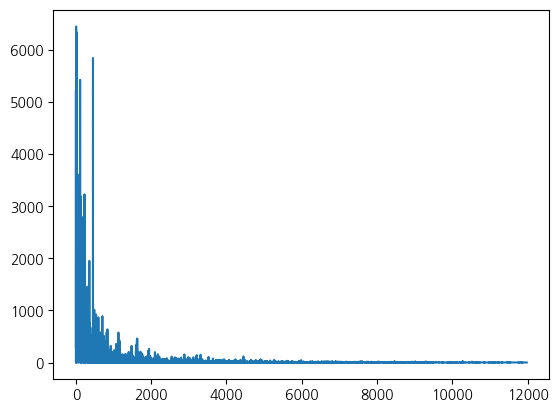

In [ ]:
import matplotlib.pyplot as plt
values = list(token_counts1.values())

plt.plot(values)
plt.show()

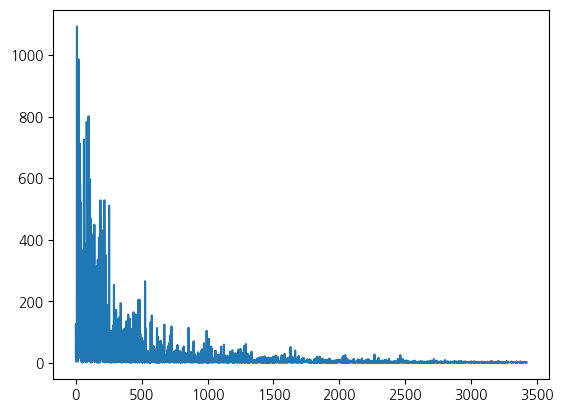

In [ ]:
values = list(token_counts2.values())

plt.plot(values)
plt.show()

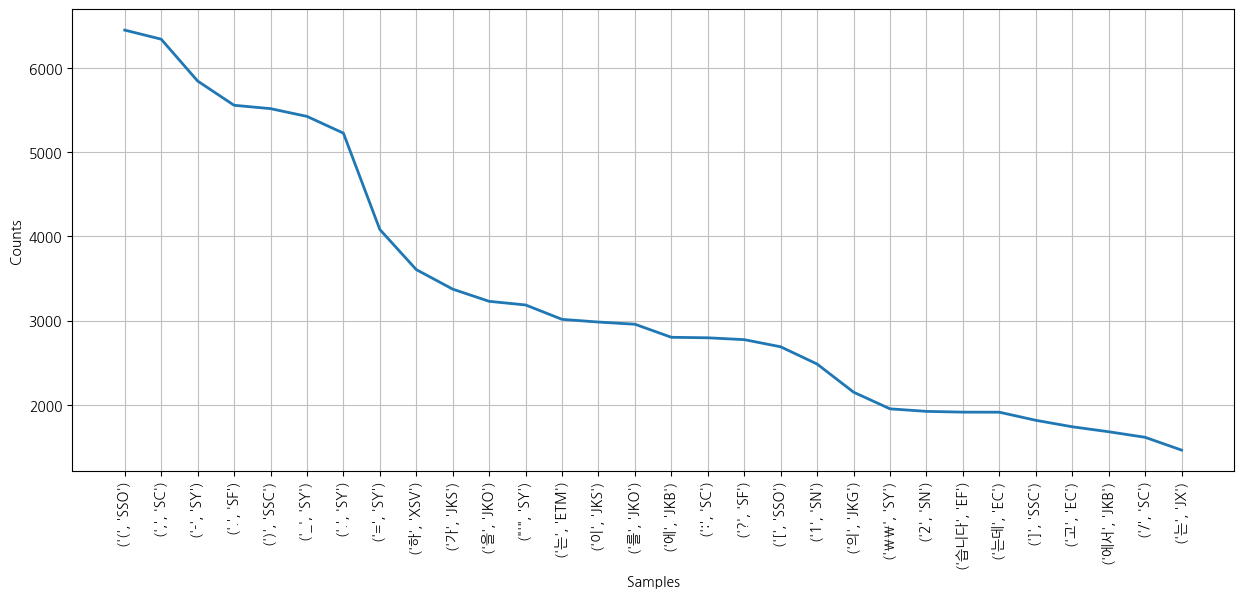

In [ ]:
from nltk import FreqDist

# 빈도 분포 추출
fdist = FreqDist(text_nltk_a)

# 가장 많이 나온 상위 30개 단어 추출하여 시각화
plt.figure(figsize=(15, 6))
fdist.plot(30)
plt.show()

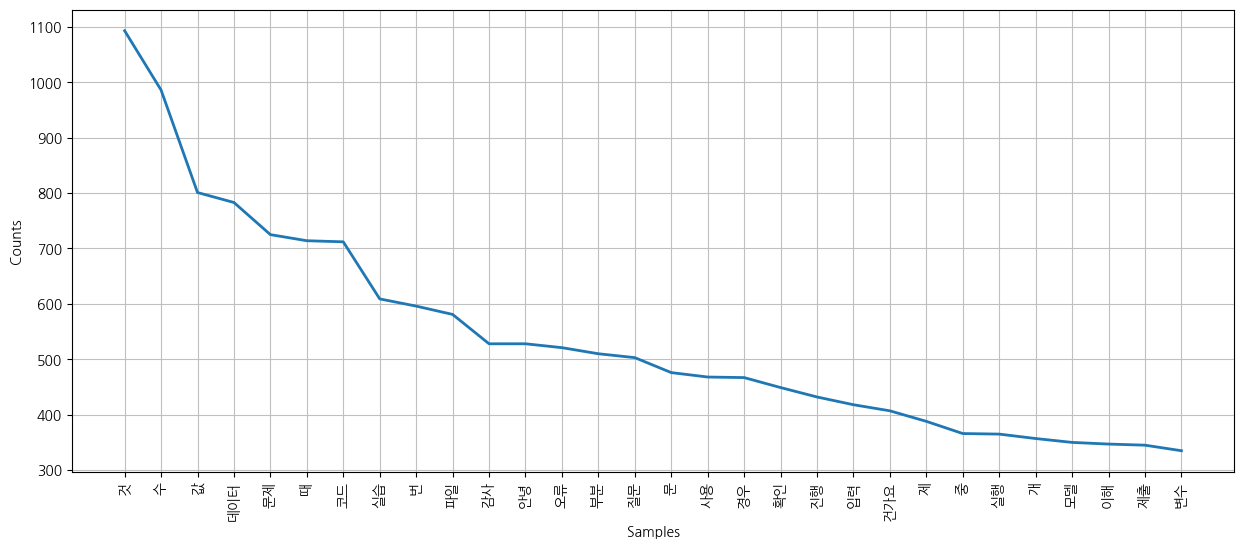

In [ ]:
from nltk import FreqDist
fdist = FreqDist(text_nltk_b)

# 가장 많이 나온 상위 30개 단어 추출하여 시각화
plt.figure(figsize=(15, 6))
fdist.plot(30)
plt.show()

In [ ]:
from nltk import collocations
measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(mecab_a)
finder.apply_freq_filter(50)
print(finder.nbest(measures.pmi, 10))

[(('most', 'SL'), ('recent', 'SL')), (('~\\', 'SY'), ('anaconda', 'SL')), (('recent', 'SL'), ('call', 'SL')), (('call', 'SL'), ('last', 'SL')), (('결', 'NNG'), ('측', 'NNB')), (('튜', 'NNP'), ('터', 'NNP')), (('딥', 'NNG'), ('러닝', 'NNG')), (('머신', 'NNG'), ('러닝', 'NNG')), (('미니', 'NNG'), ('프로젝트', 'NNG')), (('인', 'NNG'), ('스턴스', 'NNP'))]


In [ ]:
from nltk import collocations
# measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(mecab_b)
# finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(50) # only bigrams that appemar 3+ times
print(finder.nbest(measures.pmi, 10))

[('결', '측'), ('딥', '러닝'), ('튜', '터'), ('머신', '러닝'), ('미니', '프로젝트'), ('인', '스턴스'), ('원격', '지원'), ('코딩', '마스터스'), ('셀프', '테스트'), ('데이터', '프레임')]


In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 3.8 MB/s eta 0:00:00


# Print whole tree
(S (NP 원격/NNG 부탁/NNG) (VP 드립니다/VV+EC))
None

# Print noun phrases only
원격 부탁
(NP 원격/NNG 부탁/NNG)
None


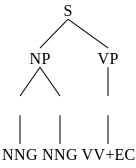

In [ ]:
# POS tag a sentence
sentence = data.loc[b.index(min(b)),"text"]
words = mecab.pos(sentence)

grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
parser = nltk.RegexpParser(grammar)
chunks = parser.parse(words)

print("# Print whole tree")
print(chunks.pprint())

print("\n# Print noun phrases only")
for subtree in chunks.subtrees():
    if subtree.label()=='NP':
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())

# Display the chunk tree
display(chunks)

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

In [ ]:
!pip install arabic_reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk_nouns.vocab()

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

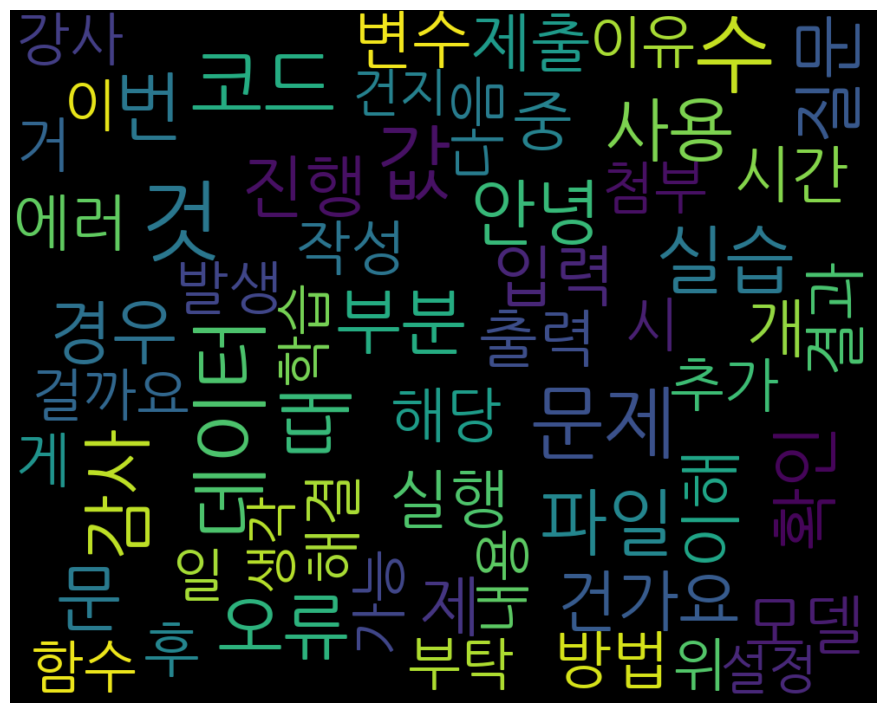

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=100,max_words=60,
                  relative_scaling=0.3,
                  width=1000,height=800,font_path=FONT_PATH).generate_from_frequencies(token_counts2)
plt.figure(figsize=(15,9))
plt.imshow(cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

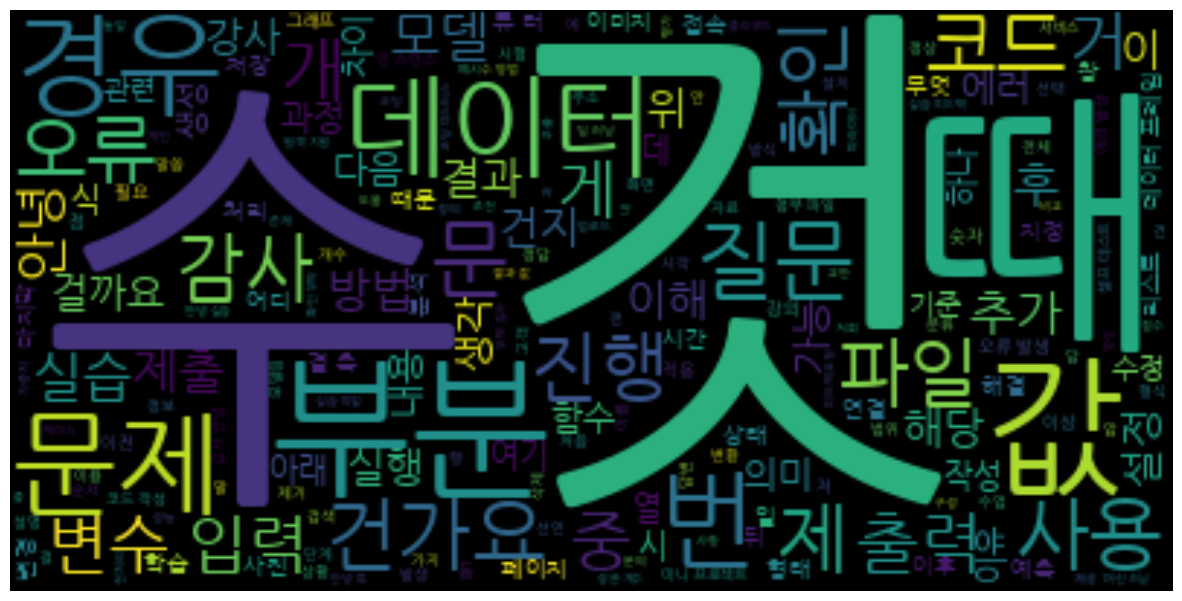

In [ ]:
from wordcloud import WordCloud


# Read the whole text.
text = ""
for i in mecab_b:
    text+=i
    text+=" "

# Generate a word cloud image
wordcloud = WordCloud(font_path=FONT_PATH).generate(text)

# Display the generated image:
# the matplotlib way:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
display(data.describe(include="all"))

,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [ ]:
import seaborn as sns

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    if label is None:
        text_question = df["text"].reset_index(drop=True)
        display(df.label.value_counts())
        norm_label = df.label.value_counts(normalize=True)
        display(norm_label)
        norm_label.plot.bar(figsize=(5,5),color=sns.color_palette("hls",n_colors=len(norm_label)))
        plt.show()
        df.info()
    else:
        text_question = df.loc[data["label"]==label,"text"].reset_index(drop=True)
        display(f"유형:{label}",text_question.head(10))
    display(text_question.describe(include="all"))
    print("-"*120)
    print("text_question type :" , type(text_question))
    
    text_length = text_question.apply(len)
    print("text_length type :" , type(text_length))
    print("-"*120)
    display(pd.DataFrame(text_length).describe().T)
    print("-"*120)
    print("최대길이: ",text_question[text_length.argmax()])
    print("최소길이: ",text_question[text_length.argmin()])

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1, title="max string length :"+ str(max(text_length)))
    sns.histplot(text_length,bins=50)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=text_length)
    plt.grid()
    plt.show()
    print("-"*120)

    nouns = text_question.apply(lambda t: mecab.nouns(str(t)))
    nouns = Text(nouns.explode())
    nouns = Text([w for w in nouns if isinstance(w,str)])
    #word cloud
    cloud = WordCloud(max_font_size=100,max_words=60,
                      relative_scaling=0.3,
                      width=1000,height=800,font_path=FONT_PATH).generate_from_frequencies(nouns.vocab())
    plt.figure(figsize=(10,8))
    plt.imshow(cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

    display(nouns.vocab().most_common(n=10))

'유형:코드1'

0    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
1    앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...
2    제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...
3    안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...
4    안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...
5    52 54 55번은 모두 3360번 문제입니다..\n\n추가로 반복문 안에 조건문이...
6    안녕하세요 3417. 오리 농법 예제 입력 1의 예제 출력 1에 대해 질문 드립니다...
7    함수 say_hey를 만들어 보세요.\n횟수를 받는 입력 매개변수 count(숫자)...
8    w =int(input("수도사용량:"))\nb= input('회사명:')\ndef...
9    파이썬을 이번에 처음 배우게 되었습니다. 코딩마스터즈 테스트에서\n\nfrom sy...
Name: text, dtype: object

count                                                   488
unique                                                  488
top       첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
freq                                                      1
Name: text, dtype: object

------------------------------------------------------------------------------------------------------------------------
text_question type : <class 'pandas.core.series.Series'>
text_length type : <class 'pandas.core.series.Series'>
------------------------------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
text,488.0,333.356557,316.485935,12.0,124.0,242.5,414.0,2655.0


------------------------------------------------------------------------------------------------------------------------
최대길이:  import collections
import re
a=list(input()) # 반복시킬 문자열 받기
b= input() # 목적
c=0 # 반복 횟수
y = [] # 반복할 문자열 갯수 
f = str(a[0]+'+'+a[1]+'+'+a[2]+'+') 

z = re.findall(f, b) 
z = list(str(z)) # z는 반복 대상 문자열
for i in z:
    if i in a:
        y.append(i)   # z중 '' ','등 불필요 문자 제거, 
        
if a[0]==a[1]==a[2]: # 반복시킬 문자열이 모두 같을 때
    d1=collections.Counter(a) # a 문자열 갯수
    d2=collections.Counter(y) # y 문자열 갯수
    while True:
        if d2-d1!=collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 적을 때
            a=a*2 # a문자열 반복
            c+=1 # 반복횟수 추가
            d1=collections.Counter(a) # 
            continue
        if d2-d1==collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 크거나 같을 때
            print(c)
            break                   
        
elif (a[0]!=a[2]) & (a[0] == a[1]): # AAB와 같은 경우
    d1=collections.Counter(a)
    d2=collections.Counter(y)
    while T

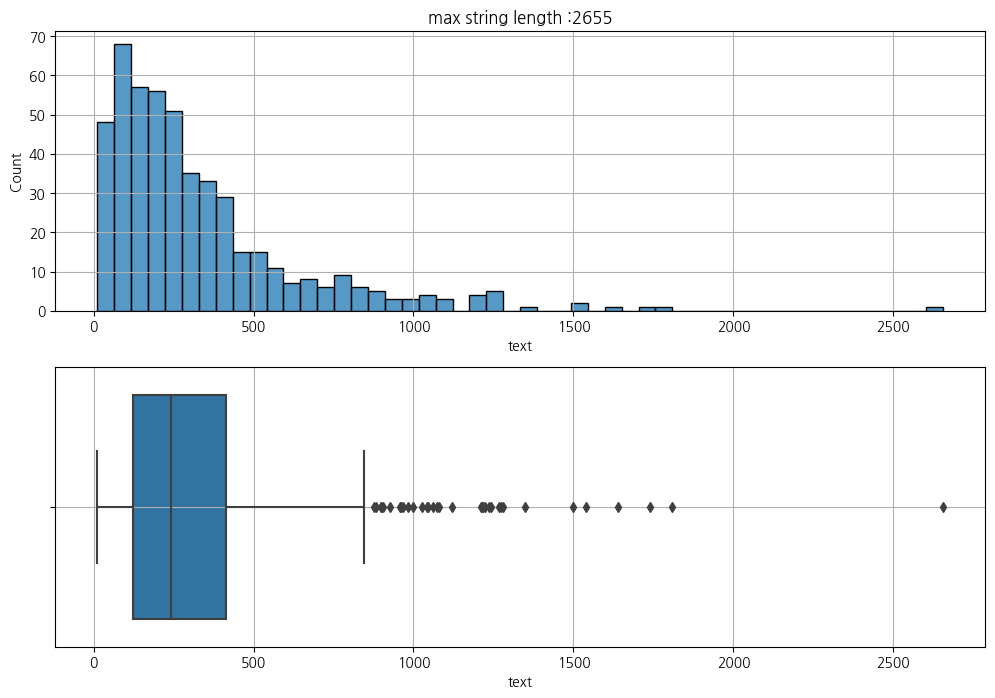

------------------------------------------------------------------------------------------------------------------------


NameError: ignored

In [ ]:
text_analysis(data,label="코드1")

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
# for label in sorted(data.label.unique()):
#     text_analysis(data,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [14]:
def mecab_token(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

In [24]:
x=data["text"]
y=data["label"]

In [25]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

In [26]:
y = y.map(label_dict)

In [27]:
x.head(10),y.head(10)

(0    self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
 1    현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
 2    glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
 3    tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
 4    filename = TEST_IMAGE + str(round(frame_sec)) ...
 5    저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
 6    PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...
 7    범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...
 8    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
 9    다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...
 Name: text, dtype: object,
 0    0
 1    1
 2    0
 3    0
 4    0
 5    2
 6    1
 7    2
 8    0
 9    1
 Name: label, dtype: int64)

In [28]:
x=pd.DataFrame(x,columns=["text"])
y=pd.DataFrame(y,columns=["label"])

### 5-2. Train Validation split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train1,x_val1,y_train1,y_val1 = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape,x_val.shape
# data_train = data.iloc[x_train.index, :]

((2964, 1), (742, 1))

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
a=test["text"].astype('str').tolist()
mecab = MeCab()

stop_words = set(stopwords.words('english')) 

result = []
for k in a :
    r=""
    for i in mecab.morphs(k):
        if i not in stop_words: 
            r+=i
            r+=" "
    result.append(r)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
a=x_train["text"].astype('str').tolist()
b=x_val["text"].astype('str').tolist()
mecab = MeCab()

stop_words = set(stopwords.words('english')) 

result = []
result2 = []
for k in a :
    r=""
    for i in mecab.morphs(k):
        if i not in stop_words: 
            r+=i
            r+=" "
    result.append(r)

for k in b :
    r=""
    for i in mecab.morphs(k):
        if i not in stop_words: 
            r+=i
            r+=" "
    result2.append(r)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
for i in range(len(result)):
    test.iloc[i,0]=result[i]

In [33]:
for i in range(len(result)):
    x_train.iloc[i,0]=result[i]
for i in range(len(result2)):
    x_val.iloc[i,0]=result2[i]

In [34]:
x_train.shape,x_val.shape

((2964, 1), (742, 1))

In [13]:
test

,text
0,팀 즈 는 노트북 으로 접속 하 고 강의 는 데스크톱 이용 하 려고 하 는데 문제 ...
1,"셀프 테스트 에서 받 은 점수 가 해당 교육 을 이수 하 고 , 취업 연계 등 을 ..."
2,= int ( input ( ' 정수 A 의 값 을 입력 하 시 오 . :')) b...
3,"def max 4 ( , b , c , ) : maximum = b & gt ; m..."
4,**= 2 가 **= 2 와 왜 같 은 지 가 이해 가 잘 안 됩니다 ! !
...,...
924,aice 특강 ppt 는 따로 안 올려 주 시 나요 ?
925,안녕 하 세요 ~! 실습 중 궁금 한 점 이 있 어 문 의 드립니다 . 1 . 라벨...
926,안녕 하 세요 . kT AIDU 에서 전 에 Associate 시험 에 대해 공부 ...
927,app 마다 urls . py 을 만들 어서 관리 하 는 게 더 좋 은 코드 인가요...


## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=['아',"휴",'아이구','아이쿠','아이고',
                                   '어','나','우리','저희','따라','의해',
                                   '을','를','에','의','가','으로','로',
                                   '에게',"좀",'저','곧','즉시','바로','당장','하자마자','그러나','그런데','하지만',
                                   '로써','하지만','일때','할때','다','한다면','등','등등','제','겨우','단지','다만','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한',
                                   '각','각각','여러분','각종','각자','제각기','하도록하다','와','과',".","ㅠㅠ","ㅜㅜ"])
vect1 = CountVectorizer(tokenizer=mecab_token)
vect1.fit(x_train["text"])
vect.fit(x_train["text"])
# vect.vocabulary_

CountVectorizer(stop_words=['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희',
                            '따라', '의해', '을', '를', '에', '의', '가', '으로', '로',
                            '에게', '좀', '저', '곧', '즉시', '바로', '당장', '하자마자',
                            '그러나', '그런데', '하지만', '로써', ...])

In [ ]:
len(vect1.vocabulary_)

10201

In [ ]:
x_train_n =vect1.transform(x_train["text"]).toarray()
x_val_n = vect1.transform(x_val['text']).toarray()

In [ ]:
x_train_n

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_n.shape,x_val_n.shape

((2964, 10201), (742, 10201))

In [35]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer(stop_words=['아',"휴",'아이구','아이쿠','아이고',
                                   '어','나','우리','저희','따라','의해',
                                   '을','를','에','의','가','으로','로',
                                   '에게',"좀",'저','곧','즉시','바로','당장','하자마자','그러나','그런데','하지만',
                                   '로써','하지만','일때','할때','다','한다면','등','등등','제','겨우','단지','다만','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한',
                                   '각','각각','여러분','각종','각자','제각기','하도록하다','와','과',".",",","ㅠㅠ","ㅜㅜ"]).fit(x_train["text"])
tfidv1 = TfidfVectorizer(tokenizer=mecab_token).fit(x_train["text"])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
x_train_tf=tfidv1.transform(x_train["text"]).toarray()
x_val_tf=tfidv1.transform(x_val["text"]).toarray()

In [37]:
test

,text
0,팀 즈 는 노트북 으로 접속 하 고 강의 는 데스크톱 이용 하 려고 하 는데 문제 ...
1,"셀프 테스트 에서 받 은 점수 가 해당 교육 을 이수 하 고 , 취업 연계 등 을 ..."
2,= int ( input ( ' 정수 A 의 값 을 입력 하 시 오 . :')) b...
3,"def max 4 ( , b , c , ) : maximum = b & gt ; m..."
4,**= 2 가 **= 2 와 왜 같 은 지 가 이해 가 잘 안 됩니다 ! !
...,...
924,aice 특강 ppt 는 따로 안 올려 주 시 나요 ?
925,안녕 하 세요 ~! 실습 중 궁금 한 점 이 있 어 문 의 드립니다 . 1 . 라벨...
926,안녕 하 세요 . kT AIDU 에서 전 에 Associate 시험 에 대해 공부 ...
927,app 마다 urls . py 을 만들 어서 관리 하 는 게 더 좋 은 코드 인가요...


In [38]:
test_tf=tfidv1.transform(test["text"]).toarray()

In [40]:
test_tf.shape

(929, 10201)

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
tokenizer_kr = Tokenizer(filters="", lower=False)
tokenizer_kr_1 = Tokenizer(lower=False)
tokenizer_kr.fit_on_texts(x_train["text"])
tokenizer_kr_1.fit_on_texts(x_train["text"])

In [ ]:
x_train_tk = tokenizer_kr.texts_to_sequences(x_train["text"])
x_val_tk = tokenizer_kr.texts_to_sequences(x_val["text"])
x_train_tk_1 = tokenizer_kr_1.texts_to_sequences(x_train["text"])
x_val_tk_1 = tokenizer_kr_1.texts_to_sequences(x_val["text"])

In [47]:
test = tokenizer_kr.texts_to_sequences(test["text"])

In [ ]:
len(max(x_train_tk,key=len))

1475

In [ ]:
len(tokenizer_kr_1.word_index) + 1

9411

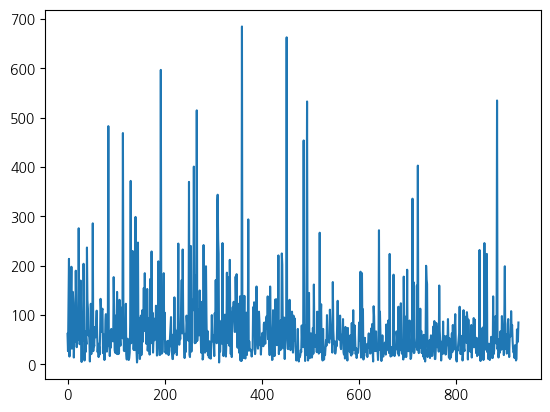

In [48]:
a=[]
for i in test:
    a.append(len(i))
plt.plot(a)
plt.show()

In [ ]:
x_train_tk = pad_sequences(x_train_tk,maxlen=600)
x_val_tk = pad_sequences(x_val_tk,maxlen=600)
x_train_tk_1 = pad_sequences(x_train_tk_1,maxlen=250)
x_val_tk_1 = pad_sequences(x_val_tk_1,maxlen=250)

In [49]:
test = pad_sequences(test,maxlen=600)

In [50]:
test.shape

(929, 600)

In [ ]:
x_train_tk.shape,x_train_tk_1.shape,x_train_tk.shape,x_val_tk.shape

((2964, 600), (2964, 250), (2964, 600), (742, 600))

In [ ]:
import re
import string
import tensorflow as tf
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
from tensorflow.keras.layers import TextVectorization
vectorize_layer = TextVectorization(standardize=custom_standardization,
                                    output_mode='int',
                                    output_sequence_length=800)


In [ ]:
len(vectorize_layer.get_vocabulary())

2

In [ ]:
vectorize_layer.adapt(x_train["text"])

In [ ]:
len(vectorize_layer.get_vocabulary())

8807

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
vectorize_text(x_train["text"],y_train)

(<tf.Tensor: shape=(2964, 800), dtype=int64, numpy=
 array([[1038,    4,  115, ...,    0,    0,    0],
        [2905,   87,   37, ...,    0,    0,    0],
        [ 520,  274,   35, ...,    0,    0,    0],
        ...,
        [  90, 1274,   79, ...,    0,    0,    0],
        [ 322,  486,  768, ...,    0,    0,    0],
        [ 286,  156,   99, ...,    0,    0,    0]])>,
       label
 1281      0
 507       4
 7         2
 2086      2
 2832      1
 ...     ...
 1130      2
 1294      2
 860       3
 3507      0
 3174      3
 
 [2964 rows x 1 columns])

In [ ]:
x_train_ds=vectorize_text(x_train["text"],y_train)[0]
x_val_ds=vectorize_text(x_val["text"],y_val)[0]

In [ ]:
from tensorflow.data import AUTOTUNE
from tensorflow.data import Dataset

x_train_ds = tf.data.Dataset.from_tensor_slices(x_train_ds)
x_val_ds = tf.data.Dataset.from_tensor_slices(x_val_ds)

AUTOTUNE = AUTOTUNE

x_train_ds = x_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
x_val_ds = x_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
x_train_ds.shape,x_val_ds.shape

(TensorShape([2964, 800]), TensorShape([742, 800]))

In [ ]:
#########################################################################################################################

In [ ]:
x_train_t = x_train["text"].apply(lambda x: " ".join(mecab_token(x)))
x_val_t = x_val["text"].apply(lambda x: " ".join(mecab_token(x)))
x_train_tl = x_train["text"].apply(lambda x: mecab_token(x))
x_val_tl = x_val["text"].apply(lambda x: mecab_token(x))

In [ ]:
x_train_tl.values

array([list(['기억/NR', '이/NR', '잘/MAG', '나/VV+EC', '질/VX+EC', '않/VX', '아/EC', '궁금/XR', '해서/XSA+EC', '질문/NNG', '드립니다/VV+EF', './SF', '1/SN', './SF', '처음/MAG', '데이터/NNG', '를/JKO', 'x/SL', ',/SC', '로/NNG', '분할/NNG', '할/XSV+ETM', '때/NNG', '뒤/NNG', '에/IC', './SF', 'values/SL', '를/JKO', '붙이/VV', '는/ETM', '이유/NNG', '가/VV+EC', '뭔가요/NP+VCP+EF', '?/SF']),
       list(['ping/SL', 'test/SL', '해/VV+EC', '보/VX', '았/EP', '는데/EC', '정말/MAG', '끊겨/VV+EC', '있/VX', '네요/EF', 'ㅠㅠ/UNKNOWN', 'virtual/SL', 'box/SL', '네트워크/NNG', '확인/NNG', '하/XSV', '긴/ETN+JX', '했/VX+EP', '는데/EC', '어떤/MM', '부분/NNG', '이/MM', '잘/MAG', '못/MAG', '되/VV', '어/EC', '있/VX', '는지/EC', '는/JX', '잘/MAG', '모르/VV', '겠/EP', '습니다/EF', './SF', './SY', '원격/NNG', '으로/JKB', '도와/VV+EC', '주/VX', '시/EP', '면/EC', '감사/NNG', '하/VV', '겠/EP', '습니다/EF', '!/SF']),
       list(['범주/NNG', '형/NNG', '데이터/NNG', '와/VV+EC', '숫자/NNG', '형/NNG', '데이터/NNG', '설명/NNG', '해/VV+EC', '주/VX', '신/EP+ETM', '내용/NNG', '잘/MAG', '읽/VV', '었/EP', '습니다/EF', './SF', '계속/MAG', '읽/VV', '고/EC'

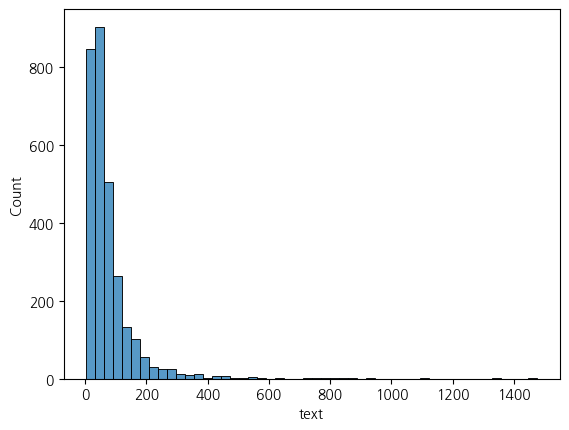

In [ ]:
train_word_count = x_train_tl.apply(lambda x:len(x))
sns.histplot(train_word_count,bins=50)
plt.show()

In [ ]:
tokenizer_kr = Tokenizer(filters="", lower=False)
tokenizer_kr_1 = Tokenizer(lower=False)
tokenizer_kr.fit_on_texts(x_train_t)
tokenizer_kr_1.fit_on_texts(x_train_t)

x_train_t = tokenizer_kr.texts_to_sequences(x_train_t)
x_val_t = tokenizer_kr.texts_to_sequences(x_val_t)
x_train_t1 = tokenizer_kr_1.texts_to_sequences(x_train_t)
x_val_t1 = tokenizer_kr_1.texts_to_sequences(x_val_t)

[[1978,
  99,
  147,
  4917,
  4075,
  61,
  246,
  101,
  1423,
  92,
  60,
  6,
  16,
  6,
  1149,
  50,
  13,
  41,
  1,
  176,
  1225,
  138,
  54,
  472,
  37,
  6,
  490,
  13,
  1870,
  9,
  244,
  19,
  1499,
  15],
 [3064,
  115,
  119,
  114,
  199,
  22,
  1309,
  4076,
  42,
  491,
  161,
  3499,
  1871,
  749,
  118,
  20,
  1424,
  368,
  22,
  141,
  81,
  17,
  147,
  286,
  26,
  66,
  42,
  73,
  40,
  147,
  151,
  87,
  23,
  6,
  3,
  413,
  34,
  1086,
  68,
  204,
  36,
  79,
  12,
  87,
  23,
  49],
 [611,
  337,
  50,
  93,
  423,
  337,
  50,
  261,
  119,
  68,
  314,
  251,
  147,
  1054,
  96,
  23,
  6,
  232,
  1054,
  25,
  4077,
  137,
  6610,
  114,
  87,
  23,
  6,
  282,
  223,
  88,
  76,
  56,
  429,
  64,
  50,
  166,
  2280,
  1742,
  1310,
  17,
  197,
  177,
  74,
  2492,
  19,
  1114,
  25,
  52,
  1114,
  25,
  197,
  50,
  185,
  6,
  724,
  40,
  336,
  50,
  19,
  611,
  337,
  50,
  1087,
  224,
  104,
  25,
  154,
  32,
  2120,
  104,
  

In [ ]:
a=[]
for i in x_train_t:
    a.append(len(i))
max(a)

1475

In [ ]:
x_train_t = pad_sequences(x_train_t,maxlen=1000)
x_val_t = pad_sequences(x_val_t,maxlen=1000)
x_train_t1 = pad_sequences(x_train_t,maxlen=1000)
x_val_t1 = pad_sequences(x_val_t,maxlen=1000)

In [ ]:
len(tokenizer_kr.word_index)+1,len(tokenizer_kr_1.word_index)+1

(10805, 9419)

In [ ]:
x_train_t.shape,x_train_t1.shape

((2964, 1000), (2964, 1000))

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
PATH = "/content/drive/MyDrive/4mini/새 폴더/"

In [ ]:
import gdown
PATH = "/content/drive/MyDrive/4mini/새 폴더/"
url = "https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg"
output = os.path.join(PATH,"ko.zip") 
gdown.download(url,output,fuzzy=True,quiet=False)
import zipfile
with zipfile.ZipFile(os.path.join(PATH,"ko.zip"),"r") as zip_ref:
    zip_ref.extractall(PATH)

Downloading...
From: https://drive.google.com/uc?id=0B0ZXk88koS2KbDhXdWg1Q2RydlU
To: /content/drive/MyDrive/4mini/새 폴더/ko.zip
100%|██████████| 80.6M/80.6M [00:00<00:00, 106MB/s]


In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index2word)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [ ]:
from gensim.models import Word2Vec,FastText,KeyedVectors
import logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : $(message)s",level=logging.INFO)
SIZE=128
WINDOW=3
MIN_COUNT=1
w2v_model=Word2Vec(sentences = x_train_tl.values,
                   window=3,
                   min_count=1,
                   workers=4,
                   negative=5,
                   sg=0)

In [ ]:
!pip uninstall gensim
!pip install gensim==3.8.3

Found existing installation: gensim 3.8.3
Uninstalling gensim-3.8.3:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/gensim-3.8.3.dist-info/*
    /usr/local/lib/python3.9/dist-packages/gensim/*
Proceed (Y/n)? y
  Successfully uninstalled gensim-3.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-3.8.3-cp39-cp39-linux_x86_64.whl


In [ ]:
from gensim.models import Word2Vec,FastText,KeyedVectors
pre_trained = Word2Vec.load(os.path.join(PATH,"ko.bin"))

In [ ]:
len(w2v_model.wv.index2word),len(pre_trained.wv.index2word)

(10803, 30185)

In [ ]:
for i,j in enumerate(w2v_model.wv.index2word):
    if i==10:
        break
    print(f"word #{i}/{len(w2v_model.wv.index2word)} is {j}")

word #0/10803 is ,/SC
word #1/10803 is (/SSO
word #2/10803 is ./SY
word #3/10803 is -/SY
word #4/10803 is _/SY
word #5/10803 is ./SF
word #6/10803 is )/SSC
word #7/10803 is =/SY
word #8/10803 is 는/ETM
word #9/10803 is '/SY


In [ ]:
for i,j in enumerate(pre_trained.wv.index2word):
    if i==10:
        break
    print(f"word #{i}/{len(pre_trained.wv.index2word)} is {j}")

word #0/30185 is 하
word #1/30185 is 이
word #2/30185 is ㄴ
word #3/30185 is 의
word #4/30185 is 는
word #5/30185 is 다
word #6/30185 is 에
word #7/30185 is 을
word #8/30185 is 었
word #9/30185 is 은


In [ ]:
w2v_model.wv["문제/NNG"]

array([ 0.32944655, -0.104991  , -0.09045696,  0.40456   ,  0.6150215 ,
        0.74381965, -0.5962869 , -0.53300375,  1.3352056 ,  0.4307947 ,
        0.03413294, -0.66653687, -0.7225834 , -0.1413349 ,  0.34223592,
       -0.5569475 , -0.20857054, -1.014004  ,  0.71388376,  0.09403395,
       -0.81676346, -0.02183604,  1.3202616 ,  0.1591989 , -0.08227956,
        0.3740127 ,  0.56121737, -0.18431863,  0.5542599 ,  0.3983    ,
       -1.5582875 , -0.00995769, -0.7480663 , -0.4007766 , -0.25475562,
       -0.22205107,  0.59632987,  0.9572566 , -0.13399667, -0.5357655 ,
       -0.28916523, -0.65060234, -0.08866429, -0.75212955,  0.26794565,
        1.2490075 , -0.40073782, -0.6194715 , -0.4529266 , -0.8585851 ,
       -0.42981395, -0.40991175,  0.6234894 ,  0.14968622,  0.8829762 ,
       -0.41684103, -0.50721496,  0.01195756,  0.09157513,  0.3160106 ,
        0.23177491, -0.4914062 , -1.7799798 ,  0.3311239 , -0.30973148,
       -0.71520567,  0.14361279,  1.2850299 , -0.39178878, -0.05

In [ ]:
print(w2v_model.wv.similar_by_word("문제/NNG"))
print(pre_trained.wv.similar_by_word("문제"))

[('연습/NNG', 0.917017936706543), ('한/MM', 0.9162453413009644), ('부분/NNG', 0.911378800868988), ('차이/NNG', 0.9103116989135742), ('내용/NNG', 0.9084684252738953), ('어디/NP', 0.9072455167770386), ('에/IC', 0.9054799675941467), ('어떤/MM', 0.9032590985298157), ('도/NNG', 0.902094304561615), ('뭐/NP', 0.8940985202789307)]
[('문제점', 0.6326159238815308), ('과제', 0.6073911190032959), ('이슈', 0.5782127380371094), ('오류', 0.5711268186569214), ('논의', 0.5632050037384033), ('난제', 0.5623012781143188), ('격차', 0.5500482320785522), ('폐해', 0.546886146068573), ('쟁점', 0.5369225740432739), ('논란', 0.5352994203567505)]


In [ ]:
x_pr_tr = get_dataset(x_train["text"].apply(lambda x: mecab.morphs(x)),pre_trained,200)
x_pr_val = get_dataset(x_val["text"].apply(lambda x: mecab.morphs(x)),pre_trained,200)

In [ ]:
x_pr_tr.shape,x_pr_val.shape

((2964, 200), (742, 200))

In [ ]:
x_pr_tr

array([[-0.15043673,  0.0341446 ,  0.13844605, ...,  0.55864394,
        -0.08384787, -0.5878807 ],
       [ 0.17354894,  0.26482207, -0.16273037, ...,  0.72161967,
        -0.3179271 ,  0.11639447],
       [-0.07656824, -0.00290128, -0.3485691 , ...,  0.37542555,
        -0.07466891, -0.27334076],
       ...,
       [-0.07608099,  0.05750574, -0.31300062, ...,  0.59560305,
        -0.22244097, -0.06856914],
       [ 0.6194101 ,  0.31543785, -0.5901112 , ...,  0.4335048 ,
        -0.03417425,  0.00220313],
       [ 0.07120693, -0.45605698,  0.5500329 , ...,  0.1954182 ,
        -0.2875987 , -0.5147951 ]], dtype=float32)

In [ ]:
x_w2v_tr = get_dataset(x_train_t,w2v_model,1000)
x_w2v_val = get_dataset(x_val_t,w2v_model,1000)

In [ ]:
x_w2v_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_w2v_tr.shape,x_w2v_val.shape

((2964, 1000), (742, 1000))

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [42]:
import numpy as np
import scipy.sparse
# sparse_matrix = scipy.sparse.csc_matrix(x_train_n)
# sparse_matrix

In [ ]:
# scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_gram.npz', sparse_matrix)

In [ ]:
sparse_matrix = scipy.sparse.csc_matrix(x_train_ds)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_sequence.npz', sparse_matrix)

In [ ]:
sparse_matrix = scipy.sparse.csc_matrix(x_val_ds)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_sequence_val.npz', sparse_matrix)

In [ ]:
# sparse_matrix = scipy.sparse.csc_matrix(x_val_n)
# scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_gram_val.npz', sparse_matrix)

In [ ]:
# type(y_train)

pandas.core.series.Series

In [ ]:
# y_train.to_csv('/content/drive/MyDrive/4mini/y_train.csv', index=False)
# y_val.to_csv('/content/drive/MyDrive/4mini/y_val.csv', index=False)

In [ ]:
# sparse_matrix = scipy.sparse.csc_matrix(x_train_tk)
# scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_sequence_tk.npz', sparse_matrix)
# sparse_matrix = scipy.sparse.csc_matrix(x_val_tk)
# scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_sequence_tk_val.npz', sparse_matrix)
# # ## x_train_n, x_train_tf
sparse_matrix = scipy.sparse.csc_matrix(x_train_n)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/n.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_val_n)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/n_val.npz', sparse_matrix)

sparse_matrix = scipy.sparse.csc_matrix(x_train_tf)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/tf.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_val_tf)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/tf_val.npz', sparse_matrix)

In [ ]:
sparse_matrix = scipy.sparse.csc_matrix(x_train_tk_1)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_sequence_tk_1.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_val_tk_1)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/sparse_matrix_sequence_tk_val_1.npz', sparse_matrix)

In [ ]:
sparse_matrix = scipy.sparse.csc_matrix(x_train_t)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/t.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_val_t)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/t_val.npz', sparse_matrix)

sparse_matrix = scipy.sparse.csc_matrix(x_train_t1)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/t1.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_val_t1)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/t1_val.npz', sparse_matrix)

In [ ]:
sparse_matrix = scipy.sparse.csc_matrix(x_pr_tr)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/x_pr_tr.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_pr_val)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/x_pr_val.npz', sparse_matrix)

In [ ]:
sparse_matrix = scipy.sparse.csc_matrix(x_w2v_tr)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/x_w2v_tr.npz', sparse_matrix)
sparse_matrix = scipy.sparse.csc_matrix(x_w2v_val)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/x_w2v_val.npz', sparse_matrix)

In [43]:
sparse_matrix = scipy.sparse.csc_matrix(test_tf)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/test.npz', sparse_matrix)

In [51]:
sparse_matrix = scipy.sparse.csc_matrix(test)
scipy.sparse.save_npz('/content/drive/MyDrive/4mini/test_seq.npz', sparse_matrix)